<a href="https://colab.research.google.com/github/Navneet-Nicer/Mobile-Price-Prediction/blob/main/Classification_Mobile_Price_Prediction3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project Name**    -  $\color{red}{\text{Mobile Price Range Prediction}}$

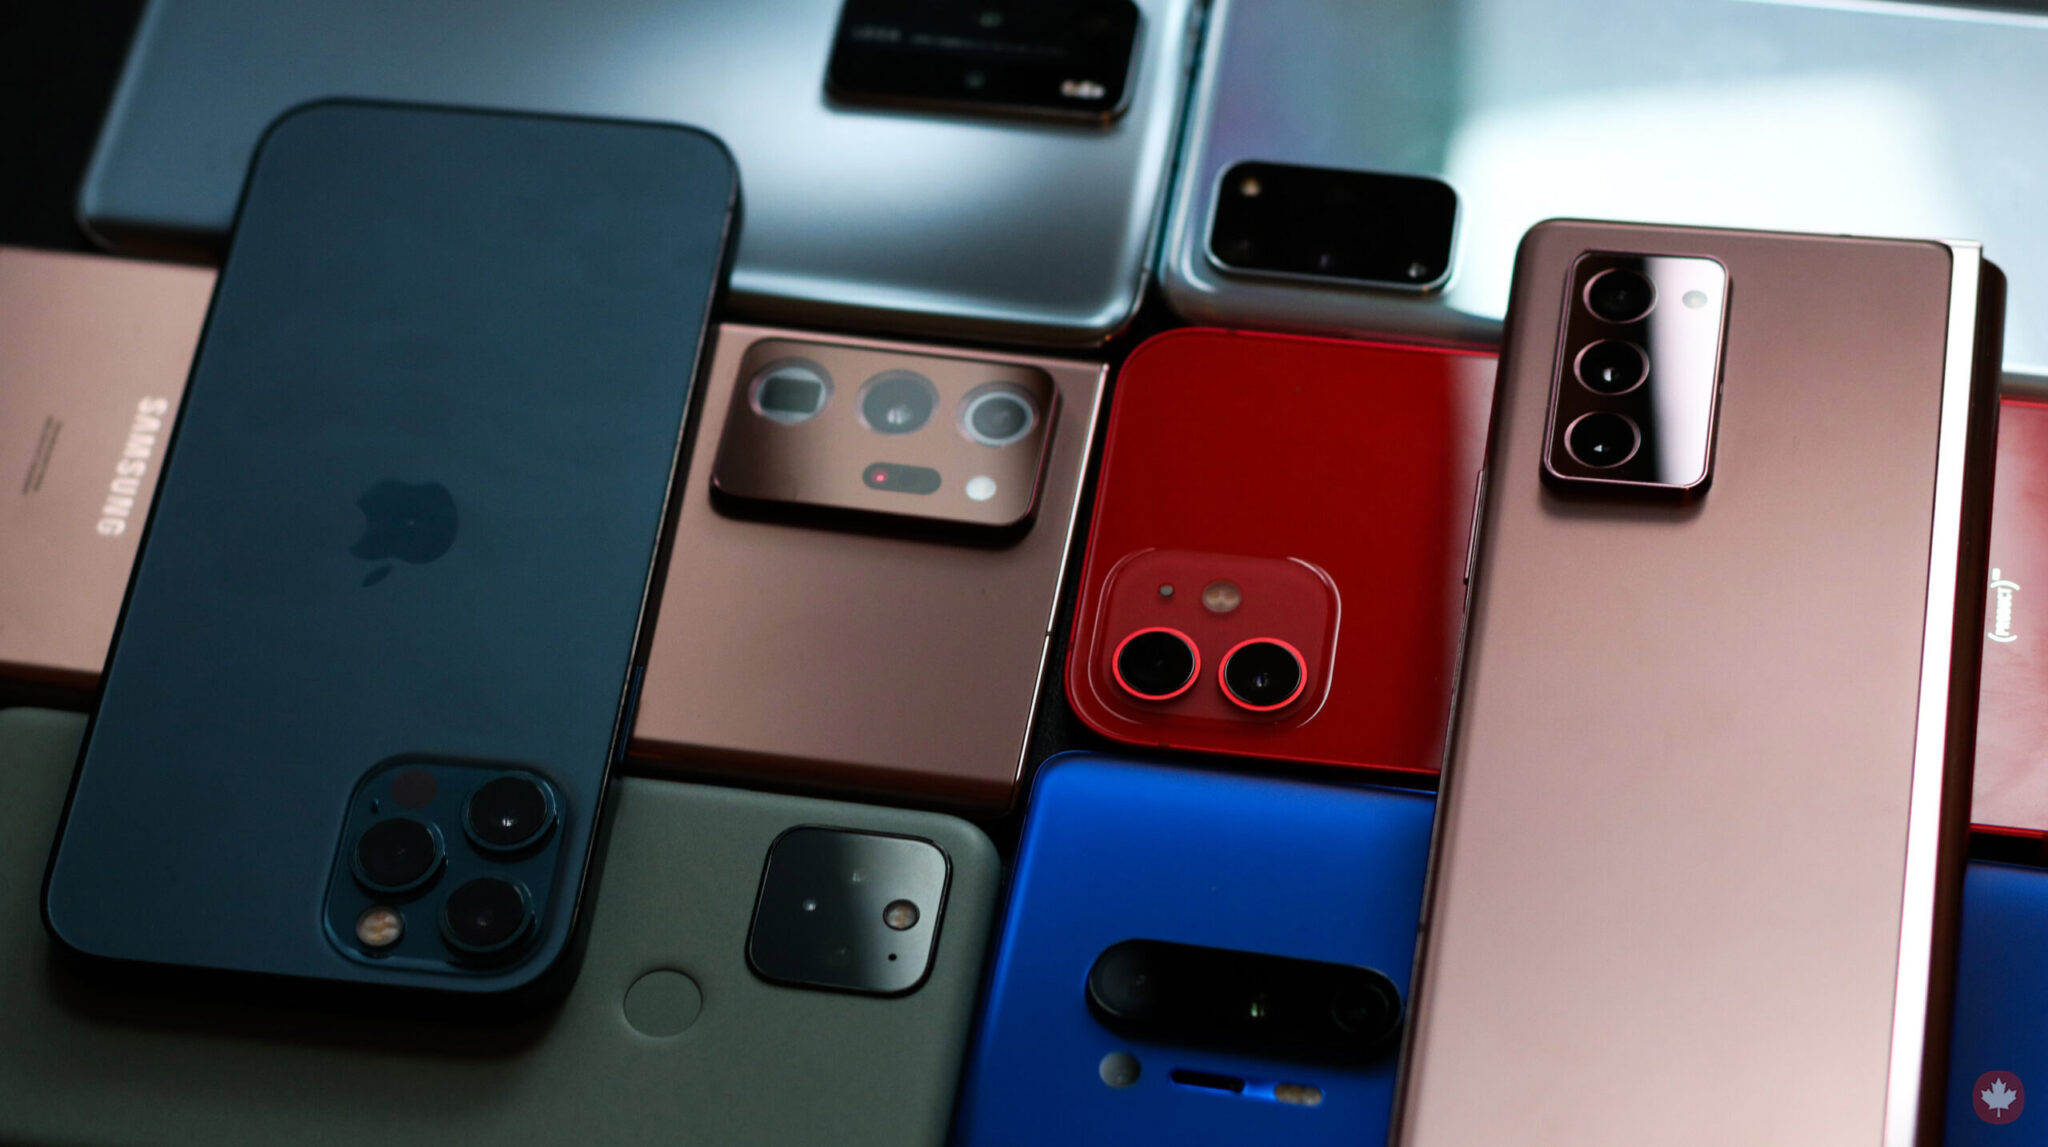

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member** -  $\color{green}{\text{Navneet Singh}}$


## **Introduction**

Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.

## **The Problem**

The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone.



**The data features are as follows:**

Battery Power in mAh

Has BlueTooth or not

Microprocessor clock speed

The phone has dual sim support or not

Front Camera Megapixels

Has 4G support or not

Internal Memory in GigaBytes

Mobile Depth in Cm

Weight of Mobile Phone

Number of cores in the processor

Primary Camera Megapixels

Pixel Resolution height

Pixel resolution width

RAM in MB

Mobile screen height in cm

Mobile screen width in cm

Longest time after a single charge

3g or not

Has touch screen or not

Has wifi or not

## **Methodology**

We will proceed with reading the data, and then perform data analysis. The practice of examining data using analytical or statistical methods in order to identify meaningful information is known as data analysis. After data analysis, we will find out the data distribution and data types. We will train 4 classification algorithms to predict the output. We will also compare the outputs. Let us get started with the project implementation.

## **GitHub Link -**
https://github.com/Naveen-King/Mobile-Price-Prediction

**Import the libraries**

In [20]:
# First, we import the libraries.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [21]:
# Dataset Loading
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
train_data=pd.read_csv('/content/drive/MyDrive/Capstone Project/Mobile price range.csv')
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [23]:
# Now, we will use the info function to see the type of data in the dataset.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [24]:
# Now, we remove the data points with missing data.
train_data_f = train_data[train_data['sc_w'] != 0]
train_data_f.shape

(1820, 21)

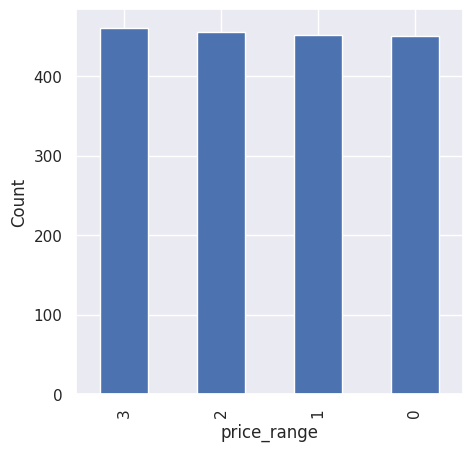

In [25]:
# Let us visualize the number of elements in each class of mobile phones.
sns.set()
price_plot=train_data_f['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

So, there are mobile phones in 4 price ranges. The number of elements is almost similar.

**Data Distribution**

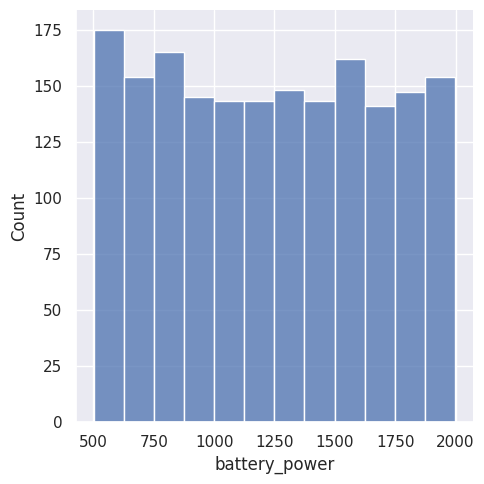

In [26]:
# First, we see how the battery mAh is spread.
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["battery_power"])
plt.show()

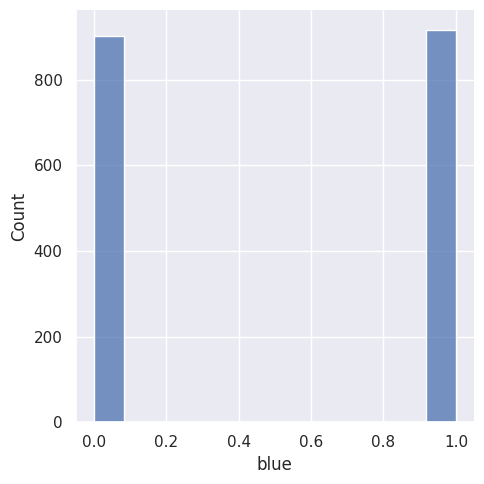

In [27]:
# Now, we see the count of how many devices have Bluetooth and how many don’t.
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["blue"])
plt.show()

So, we can see that half the devices have Bluetooth, and half don’t.

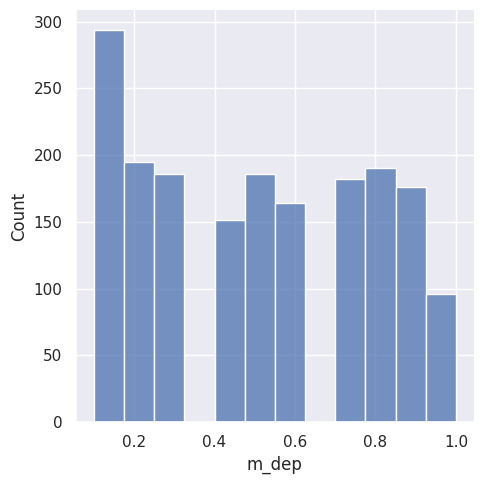

In [28]:
# Next, we analyse the mobile depth (in cm).
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["m_dep"])
plt.show()

A few mobiles are very thin and a few ones are almost a cm thick.

In [29]:
# Let us see if there are any missing values or missing data.
X=train_data_f.drop(['price_range'], axis=1)
y=train_data_f['price_range']

#missing values
X.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

**Let us split the data.**

In [30]:
#train test split of data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)

Now, we define a function for creating a confusion matrix.

In [31]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

Now, as the function is defined, we can proceed with implementing the classification algorithms.

### **Random Forest Classifier**

A random forest is a supervised machine learning method built from decision tree techniques. This algorithm is used to anticipate behaviour and results in a variety of sectors, including banking and e-commerce.

A random forest is a machine learning approach for solving regression and classification issues. It makes use of ensemble learning, which is a technique that combines multiple classifiers to solve complicated problems.

A random forest method is made up of a large number of decision trees. The random forest algorithm’s ‘forest’ is trained via bagging or bootstrap aggregation. Bagging is a meta-algorithm ensemble that increases the accuracy of machine learning algorithms.

The outcome is determined by the (random forest) algorithm based on the predictions of the decision trees. It forecasts by averaging or averaging the output of several trees. The precision of the outcome improves as the number of trees grows.

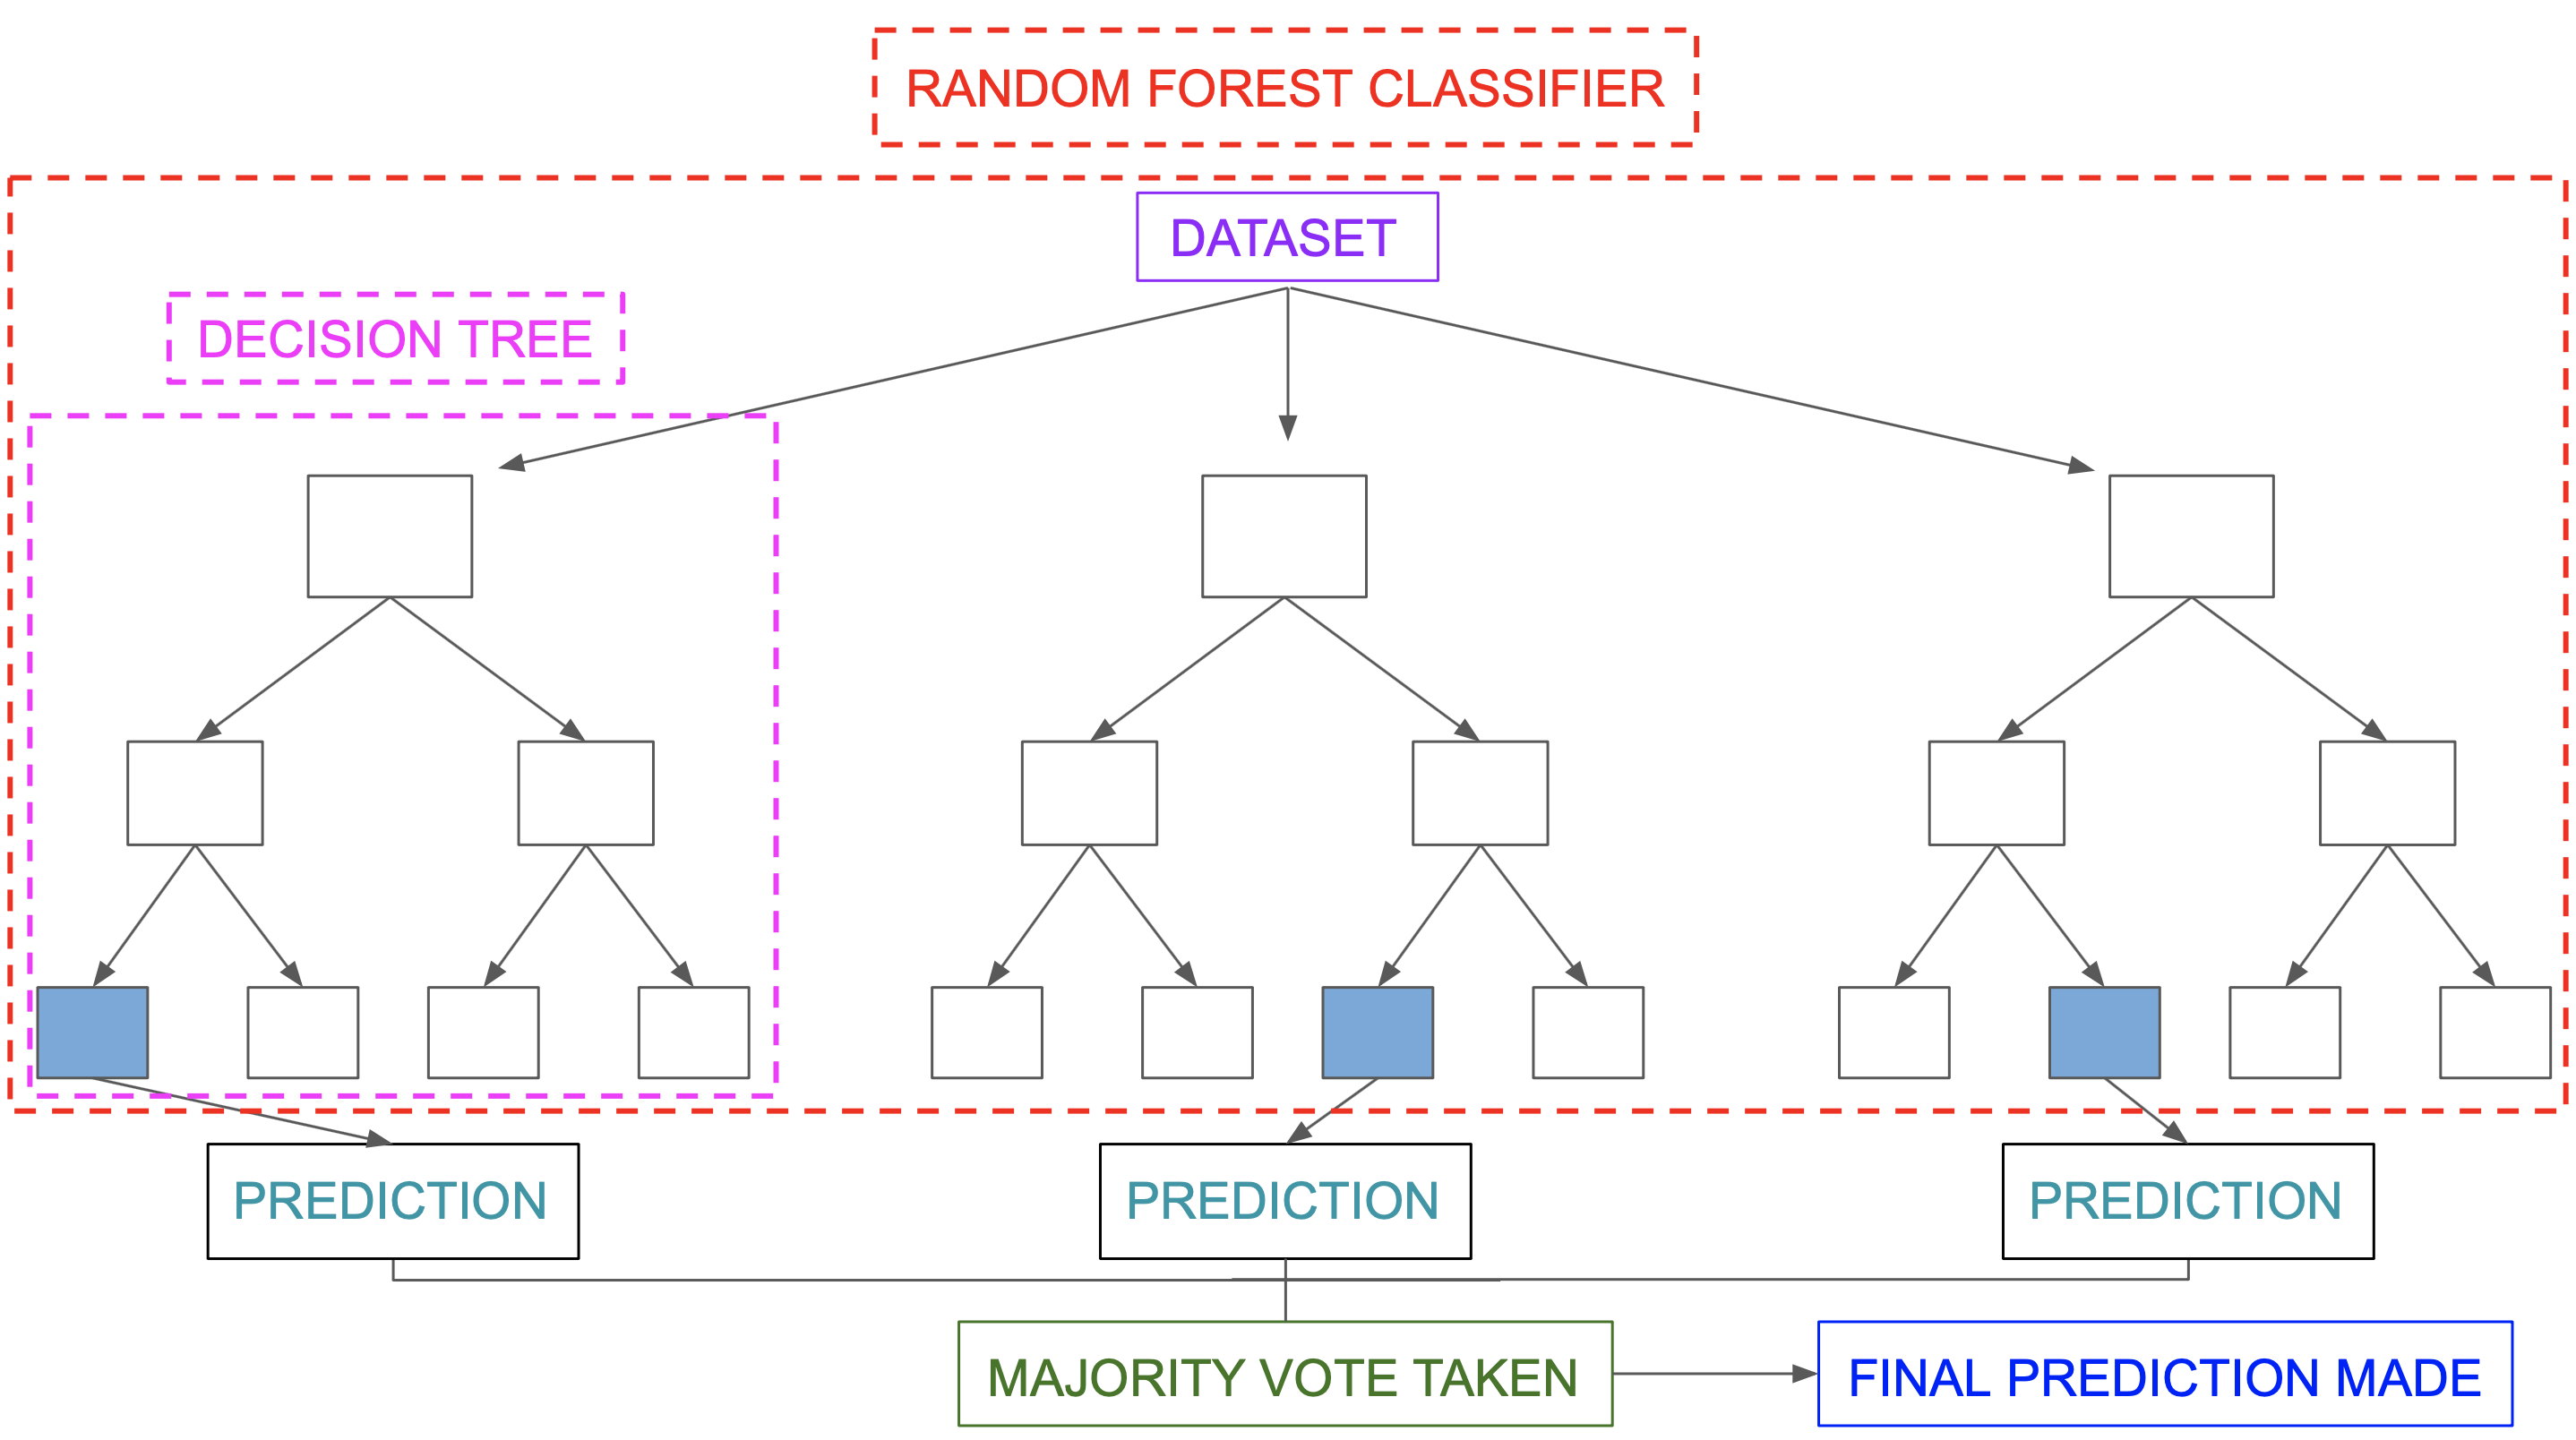


A random forest system is built on a variety of decision trees. Every decision tree is made up of nodes that represent decisions, leaf nodes, and a root node. The leaf node of each tree represents the decision tree’s final result. The final product is chosen using a majority-voting procedure. In this situation, the output picked by the majority of the decision trees becomes the random forest system’s ultimate output. Let us now implement the random forest algorithm.

**First, we build the model.**

In [32]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [34]:
# Now, we do the training and prediction.
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)

Random Forest Classifier Accuracy Score:  0.9093406593406593
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.90      0.92      0.91        92
           2       0.82      0.86      0.84        86
           3       0.93      0.88      0.90        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



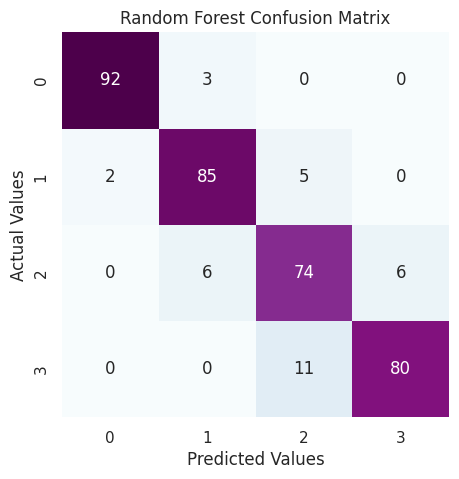

In [35]:
# Let us apply the function for the accuracy metrics.
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')

So, we can see that the random forest algorithm has good accuracy in prediction.

**Naive Bayes**

Conditional probability is the foundation of Bayes’ theorem. The conditional probability aids us in assessing the likelihood of something occurring if something else has previously occurred.

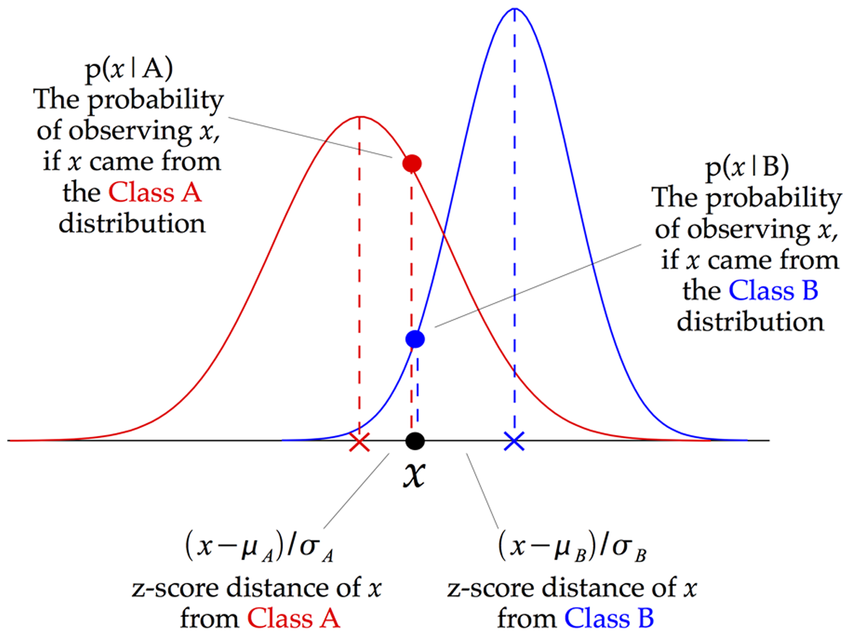

Gaussian Naive Bayes is a Naive Bayes variation that allows continuous data and follows the Gaussian normal distribution. The Bayes theorem is the foundation of a family of supervised machine learning classification algorithms known as naive Bayes. It is a basic categorization approach with a lot of power. When the dimensionality of the inputs is high, they are useful. The Naive Bayes Classifier may also be used to solve complex classification issues.

In [36]:
# Let us implement the Gaussian NB classifier.
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [37]:
# Now, we perform the training and prediction.
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_valid)

Gaussian NB Classifier Accuracy Score:  0.8461538461538461
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        95
           1       0.79      0.73      0.76        92
           2       0.74      0.80      0.77        86
           3       0.92      0.93      0.93        91

    accuracy                           0.85       364
   macro avg       0.84      0.85      0.84       364
weighted avg       0.85      0.85      0.85       364



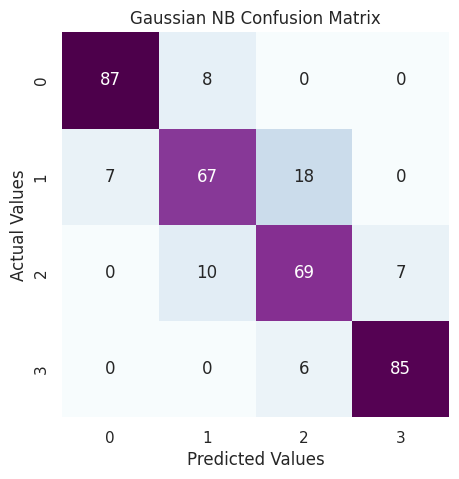

In [38]:
# Now, we can check the accuracy.
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')

We can see that the model is performing well.

**KNN Classifier**

The K Nearest Neighbor method is a type of supervised learning technique that is used for classification and regression. It’s a flexible approach that may also be used to fill in missing values and resample datasets. K Nearest Neighbor examines K Nearest Neighbors (Data points) to forecast the class or continuous value for a new Datapoint, as the name indicates.

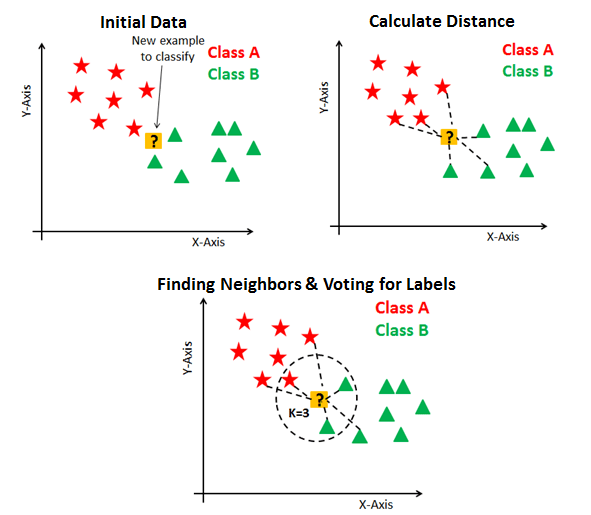

The K-NN method saves all available data and classifies a new data point based on its similarity to the existing data. This implies that fresh data may be quickly sorted into a well-defined category using the K-NN method. The K-NN algorithm is a non-parametric algorithm, which means it makes no assumptions about the underlying data. It’s also known as a lazy learner algorithm since it doesn’t learn from the training set right away; instead, it saves the dataset and performs an action on it when it comes time to classify it.

In [40]:
# Let us perform the implementation of the classifier.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)

In [41]:
# Now, we train the data and make our predictions.
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_valid)

KNN Classifier Accuracy Score:  0.9340659340659341
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.87      0.88      0.88        86
           3       0.94      0.90      0.92        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



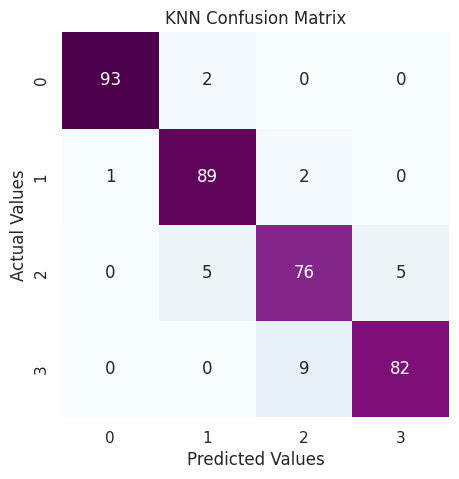

In [42]:
# Now, we check the accuracy.
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')

The KNN classifier is quite adept at its task.

**SVM Classifier**

Support Vector Machine, or SVM, is a prominent Supervised Learning technique that is used for both classification and regression issues. However, it is mostly utilised in Machine Learning for Classification purposes.

The SVM algorithm’s purpose is to find the optimum line or decision boundary for categorising n-dimensional space so that we may simply place fresh data points in the proper category in the future. A hyperplane is the optimal choice boundary.

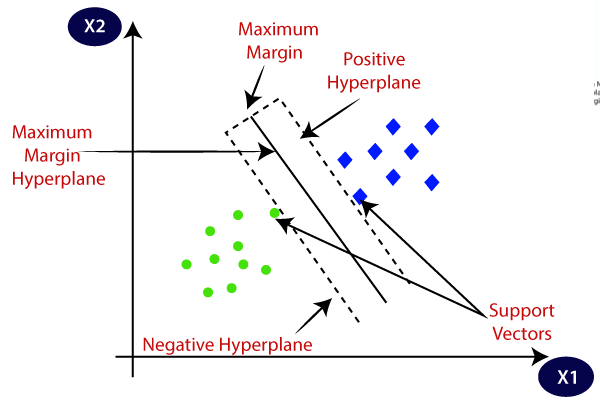



In [43]:
# Let us do the implementation of SVM.
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)

SVM Classifier Accuracy Score:  0.9587912087912088
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.94      0.93      0.94        86
           3       0.99      0.96      0.97        91

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



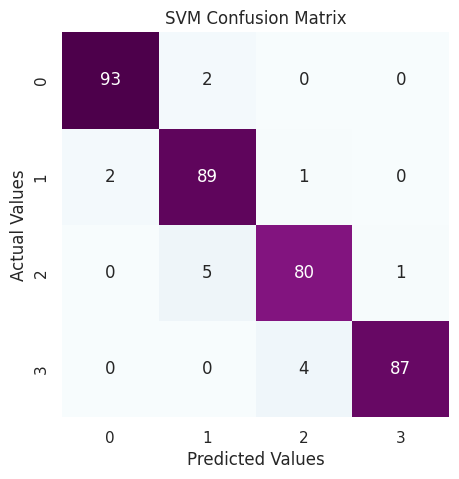

In [45]:
# Now, we check the accuracy.
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')

We can see that the SVM classifier is giving the best accuracy.

**Conclusion**

In this, we looked at classification. Classifiers represent the intersection of advanced machine theory and practical application. These algorithms are more than just a sorting mechanism for organising unlabeled data instances into distinct groupings. Classifiers include a unique set of dynamic rules that include an interpretation mechanism for dealing with ambiguous or unknown values, all of which are suited to the kind of inputs being analysed. Most classifiers also utilise probability estimates, which enable end-users to adjust data categorization using utility functions.